In [6]:
import pandas as pd

from dotenv import load_dotenv
from graph import kernel
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

load_dotenv()

df = pd.read_csv('cipher_dataset.csv')
df.head()

,Plaintext,Ciphertext,CipherType
0,The cat jumped over the fence,Cqn ljc sdvynm xena cqn onwln,caesar
1,The cat jumped over the fence,OFG VKO WJQLGE ZIGP OFG HGDVG,substitution
2,The cat jumped over the fence,ecnef eht revo depmuj tac ehT,transposition
3,The cat jumped over the fence,VVH GCH MYODHH QJHV VVH JGBFI,vigenere
4,The cat jumped over the fence,GSV XZG QFNKVW LEVI GSV UVMXV,atbash


In [11]:
# Filter the dataset to only include the desired CipherTypes
selected_ciphers = ['caesar', 'atbash', 'transposition', 'bacon']
filtered_df = df[df['CipherType'].isin(selected_ciphers)]

# Randomly select 10 records for each CipherType
sampled_df = filtered_df.groupby('CipherType', group_keys=False).apply(lambda x: x.sample(n=min(10, len(x)), random_state=42))

# Reset index if desired
sampled_df = sampled_df.reset_index(drop=True)

# Display the sampled result
sampled_df.head()

C:\Users\Aghogho\AppData\Local\Temp\ipykernel_27976\1673772180.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = filtered_df.groupby('CipherType', group_keys=False).apply(lambda x: x.sample(n=min(10, len(x)), random_state=42))


,Plaintext,Ciphertext,CipherType
0,The sound of waves crashing was soothing,GSV HLFMW LU DZEVH XIZHSRMT DZH HLLGSRMT,atbash
1,She whispered his name in the quiet room,HSV DSRHKVIVW SRH MZNV RM GSV JFRVG ILLN,atbash
2,The road was lined with tall trees,GSV ILZW DZH ORMVW DRGS GZOO GIVVH,atbash
3,They shared a quiet moment together,GSVB HSZIVW Z JFRVG NLNVMG GLTVGSVI,atbash
4,The wind carried the scent of the sea,GSV DRMW XZIIRVW GSV HXVMG LU GSV HVZ,atbash


--GET CIPHER TYPE--
--RUN DECRYPTOR--
--DECRYPTOR:  ['atbash'] --
--GET CIPHER TYPE--
--RUN DECRYPTOR--
--DECRYPTOR:  ['atbash'] --
--GET CIPHER TYPE--
--RUN DECRYPTOR--
--DECRYPTOR:  ['atbash'] --
--GET CIPHER TYPE--
--RUN DECRYPTOR--
--DECRYPTOR:  ['atbash'] --
--GET CIPHER TYPE--
--RUN DECRYPTOR--
--DECRYPTOR:  ['atbash'] --
--GET CIPHER TYPE--
--RUN DECRYPTOR--
--DECRYPTOR:  ['atbash'] --
--GET CIPHER TYPE--
--RUN DECRYPTOR--
--DECRYPTOR:  ['caesar'] --
--GET CIPHER TYPE--
--RUN DECRYPTOR--
--DECRYPTOR:  ['atbash'] --
--GET CIPHER TYPE--
--RUN DECRYPTOR--
--DECRYPTOR:  ['atbash'] --
--GET CIPHER TYPE--
--RUN DECRYPTOR--
--DECRYPTOR:  ['atbash'] --
--GET CIPHER TYPE--
--RUN DECRYPTOR--
--DECRYPTOR:  ['bacon'] --
--GET CIPHER TYPE--
--RUN DECRYPTOR--
--DECRYPTOR:  ['bacon'] --
--GET CIPHER TYPE--
--RUN DECRYPTOR--
--DECRYPTOR:  ['bacon'] --
--GET CIPHER TYPE--
--RUN DECRYPTOR--
--DECRYPTOR:  ['bacon'] --
--GET CIPHER TYPE--
--RUN DECRYPTOR--
--DECRYPTOR:  ['bacon'] --
--GET CIPHER TY

C:\Users\Aghogho\AppData\Local\Temp\ipykernel_27976\1905146724.py:70: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Aghogho\.virtualenvs\cipherwhisperer-rRWY1vTw\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


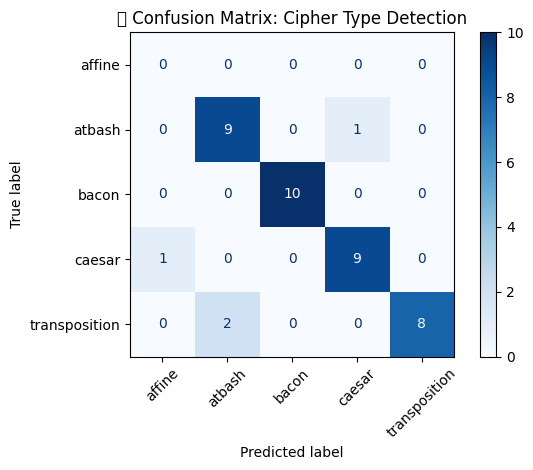

In [14]:
# Metrics
total = 0
correct_cipher_detected = 0
correct_decryption = 0

# Per-cipher tracking
cipher_stats = defaultdict(lambda: {"total": 0, "correct_type": 0, "correct_decrypt": 0})

# For confusion matrix
y_true = []
y_pred = []

for index, row in sampled_df.iterrows():
    plaintext = row['Plaintext'].lower().strip()
    ciphertext = row['Ciphertext']
    true_cipher = row['CipherType']

    # Update ground truth
    y_true.append(true_cipher)

    # Send to your model/system
    response = kernel.invoke(input={"question": ciphertext})

    # Extract and normalize
    suspected_ciphers = response.get("suspected_ciphers", [])
    decrypted_ciphers = response.get("decrypted_ciphers", [])

    total += 1
    cipher_stats[true_cipher]["total"] += 1

    # Default prediction
    predicted_cipher = suspected_ciphers[0] if suspected_ciphers else "unknown"
    y_pred.append(predicted_cipher)

    # Check cipher type
    if true_cipher in suspected_ciphers:
        correct_cipher_detected += 1
        cipher_stats[true_cipher]["correct_type"] += 1

        # Get index of matched cipher
        idx = suspected_ciphers.index(true_cipher)

        # Match decryption (lowercase match)
        if idx < len(decrypted_ciphers):
            decrypted_text = decrypted_ciphers[idx].lower().strip()
            if decrypted_text == plaintext:
                correct_decryption += 1
                cipher_stats[true_cipher]["correct_decrypt"] += 1

# Display overall stats
print(f"\nOverall Accuracy:")
print(f"Total Samples: {total}")
print(f"Correct Cipher Detections: {correct_cipher_detected} ({correct_cipher_detected/total:.2%})")
print(f"Correct Decryptions: {correct_decryption} ({correct_decryption/total:.2%})")

# Per-cipher stats
print("\nAccuracy Per Cipher Type:")
for cipher, stats in cipher_stats.items():
    print(f"{cipher:<15} | Samples: {stats['total']:>2} | Cipher ID: {stats['correct_type']:>2} ({stats['correct_type']/stats['total']:.0%}) | Decryption: {stats['correct_decrypt']:>2} ({stats['correct_decrypt']/stats['total']:.0%})")

# Confusion Matrix
labels = sorted(set(y_true + y_pred))
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Using ConfusionMatrixDisplay for a clearer visualization
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="Blues", values_format="d", xticks_rotation=45)

plt.title("🔄 Confusion Matrix: Cipher Type Detection")
plt.tight_layout()
plt.show()